In [1]:
from csv import QUOTE_NONNUMERIC

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from memote import ReportConfiguration
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

In [4]:
%matplotlib inline

In [5]:
plt.rcParams['figure.figsize'] = 16, 9

In [6]:
colors = [
  "#A6A9AA",
  "#000000",
  "#3E7CBC",
  "#A3D2E2",
  "#DDEDF6",
  "#EDA85F",
  "#CD2028"
]

## Extract

In [7]:
bucket = []
for filename, collection in [
    ("../data/bigg.csv.gz", "bigg"),
    ("../data/uminho.csv.gz", "uminho"),
    ("../data/mmodel.csv.gz", "ebrahim"),
    ("../data/agora.csv.gz", "agora"),
    ("../data/embl_gems.csv.gz", "embl"),
    ("../data/path2models.csv.gz", "path"),
    ("../data/seed.csv.gz", "seed"),
]:
    tmp = pd.read_csv(filename)
    tmp["collection"] = collection
    bucket.append(tmp)
df = pd.concat(bucket, ignore_index=True)

In [8]:
df.shape

(1379545, 8)

In [9]:
df.head()

,test,title,section,metric,numeric,model,time,collection
0,test_absolute_extreme_coefficient_ratio,Ratio Min/Max Non-Zero Coefficients,matrix,0.0,2.706242e+07,iE2348C_1286,0.046556,bigg
1,test_biomass_consistency,Biomass Consistency,test_biomass,0.0,9.996578e-01,iE2348C_1286,0.000978,bigg
2,test_biomass_consistency,Biomass Consistency,test_biomass,0.0,9.999945e-01,iE2348C_1286,0.000775,bigg
3,test_biomass_default_production,Biomass Production In Default Medium,test_biomass,1.0,0.000000e+00,iE2348C_1286,0.006497,bigg
4,test_biomass_default_production,Biomass Production In Default Medium,test_biomass,0.0,9.824784e-01,iE2348C_1286,0.739684,bigg


## Transform

Exclude the biomass section since it is not universally applicable and may contain multiple reactions per model. We also exclude the matrix section since that is purely informative and says nothing about the model quality.

In [10]:
df = df.loc[~df["section"].isin([
    "matrix",
    "test_biomass"
]), :]

We further exclude tests related to the biomass but from different sections.

In [11]:
df = df.loc[~df["test"].isin([
    "test_biomass_open_production",
    "test_essential_precursors_not_in_biomass",
    "test_gam_in_biomass"
]), :]

We further invalidate metric results where the numeric test result is missing.

In [12]:
df.loc[df["numeric"].isnull(), "metric"] = float("nan")

In [13]:
df["collection"].unique()

array(['bigg', 'uminho', 'ebrahim', 'agora', 'embl', 'path', 'seed'],
      dtype=object)

### Pivot Table

Each model from each collection is one observation (row) and each test case constitutes one variable or category (column) measuring model performance.

In [14]:
observations = df.set_index(["collection", "model", "test"])

Check for duplicates which will prevent unstacking.

In [15]:
observations[observations.index.duplicated(keep=False)].sort_index()

,,,title,section,metric,numeric,time
collection,model,test,,,,,


In [16]:
observations = observations.loc[:, ["metric"]].unstack()
observations.head()

metric  \
test                                             test_biomass_specific_sbo_presence   
collection model                                                                      
agora      Abiotrophia_defectiva_ATCC_49176                                     1.0   
           Achromobacter_xylosoxidans_A8                                        1.0   
           Achromobacter_xylosoxidans_NBRC_15126                                1.0   
           Acidaminococcus_fermentans_DSM_20731                                 1.0   
           Acidaminococcus_intestini_RyC_MR95                                   1.0   

                                                                         \
test                                             test_blocked_reactions   
collection model                                                          
agora      Abiotrophia_defectiva_ATCC_49176                    0.285182   
           Achromobacter_xylosoxidans_A8                       0.356715   
           Achromobacter_xylosoxidans_NBRC_15126               0.288530   
           Acidaminococcus_fermentans_DSM_20731                0.347550   
           Acidaminococcus_intestini_RyC_MR95                  0.302697   

                                                                             \
test                                             test_compartments_presence   
collection model                                                              
agora      Abiotrophia_defectiva_ATCC_49176                             0.0   
           Achromobacter_xylosoxidans_A8                                0.0   
           Achromobacter_xylosoxidans_NBRC_15126                        0.0   
           Acidaminococcus_fermentans_DSM_20731                         0.0   
           Acidaminococcus_intestini_RyC_MR95                           0.0   

                                                                                    \
test                                             test_demand_specific_sbo_presence   
collection model                                                                     
agora      Abiotrophia_defectiva_ATCC_49176                                    1.0   
           Achromobacter_xylosoxidans_A8                                       1.0   
           Achromobacter_xylosoxidans_NBRC_15126                               1.0   
           Acidaminococcus_fermentans_DSM_20731                                1.0   
           Acidaminococcus_intestini_RyC_MR95                                  1.0   

                                                                                      \
test                                             test_exchange_specific_sbo_presence   
collection model                                                                       
agora      Abiotrophia_defectiva_ATCC_49176                                      1.0   
           Achromobacter_xylosoxidans_A8                                         1.0   
           Achromobacter_xylosoxidans_NBRC_15126                                 1.0   
           Acidaminococcus_fermentans_DSM_20731                                  1.0   
           Acidaminococcus_intestini_RyC_MR95                                    1.0   

                                                                    \
test                                             test_fbc_presence   
collection model                                                     
agora      Abiotrophia_defectiva_ATCC_49176                    0.0   
           Achromobacter_xylosoxidans_A8                       0.0   
           Achromobacter_xylosoxidans_NBRC_15126               0.0   
           Acidaminococcus_fermentans_DSM_20731                0.0   
           Acidaminococcus_intestini_RyC_MR95                  0.0   

                                                                                             \
test                                             test_find_candidate_irreversible_reactions   
c

In [17]:
observations.shape

(10828, 113)

In [18]:
observations.index.get_level_values("collection").unique()

Index(['agora', 'bigg', 'ebrahim', 'embl', 'path', 'seed', 'uminho'], dtype='object', name='collection')

### Handle Missing Values

In [19]:
observations.isna().sum(axis=0).sort_values(ascending=False)

        test                                                  
metric  test_find_candidate_irreversible_reactions                5680
        test_ngam_presence                                        3527
        test_protein_complex_presence                              658
        test_gene_product_annotation_overview-ncbiprotein           59
        test_gene_product_annotation_overview-refseq                59
        test_gene_product_annotation_overview-uniprot               59
        test_gene_product_annotation_overview-asap                  59
        test_gene_product_annotation_overview-ccds                  59
        test_gene_product_annotation_overview-ecogene               59
        test_gene_product_annotation_overview-hprd                  59
        test_gene_product_annotation_overview-kegg.genes            59
        test_gene_product_annotation_overview-ncbigene              59
        test_gene_product_annotation_overview-ncbigi                59
        test_f

We set the missing values equivalent to being completely wrong, i.e., metric = 1.

In [20]:
observations[observations.isna()] = 1.0

## Dimension Reduction

### PCA

In [21]:
%%time
pca = PCA(n_components=2).fit_transform(observations)

CPU times: user 385 ms, sys: 222 ms, total: 608 ms
Wall time: 103 ms


In [22]:
x = []
y = []
lbl = []
for label in observations.index.get_level_values("collection").unique():
    mask = observations.index.get_level_values("collection") == label
    x.extend(pca[mask, 0])
    y.extend(pca[mask, 1])
    lbl.extend([label] * mask.sum())
pd.DataFrame({"x": x, "y": y, "collection": lbl}).to_csv("../data/metric_pca.csv.gz", index=False,
                                                         quoting=QUOTE_NONNUMERIC, compression="gzip")

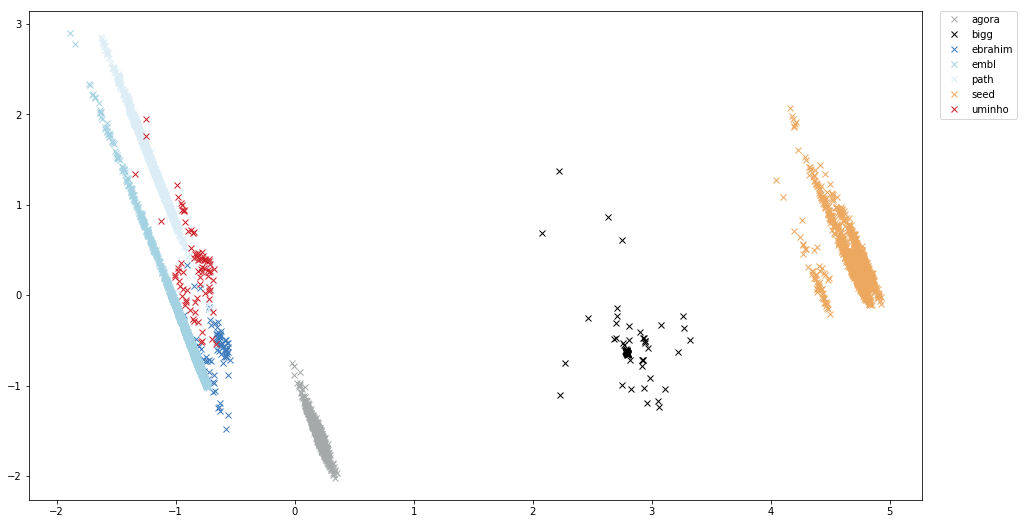

In [23]:
for label, color in zip(observations.index.get_level_values("collection").unique(), colors):
    mask = observations.index.get_level_values("collection") == label
    plt.plot(pca[mask, 0], pca[mask, 1], "x", color=color, label=label)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()

### t-SNE

In [24]:
%%time
tsne = TSNE(n_components=2).fit_transform(observations)

CPU times: user 1min 16s, sys: 25 ms, total: 1min 16s
Wall time: 1min 16s


In [25]:
x = []
y = []
lbl = []
for label in observations.index.get_level_values("collection").unique():
    mask = observations.index.get_level_values("collection") == label
    x.extend(tsne[mask, 0])
    y.extend(tsne[mask, 1])
    lbl.extend([label] * mask.sum())
pd.DataFrame({"x": x, "y": y, "collection": lbl}).to_csv("../data/metric_tsne.csv.gz", index=False,
                                                         quoting=QUOTE_NONNUMERIC, compression="gzip")

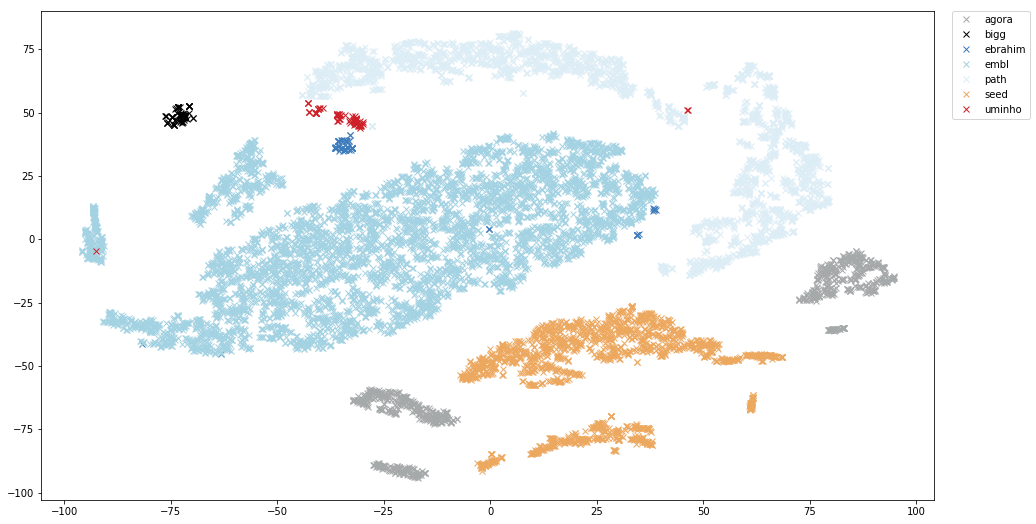

In [26]:
for label, color in zip(observations.index.get_level_values("collection").unique(), colors):
    mask = observations.index.get_level_values("collection") == label
    plt.plot(tsne[mask, 0], tsne[mask, 1], "x", color=color, label=label)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()

### UMAP

In [27]:
%%time
umap = UMAP(n_components=2).fit_transform(observations)

/home/moritz/.virtualenvs/memote-meta/lib/python3.6/site-packages/umap/spectral.py:229 UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)


CPU times: user 20.1 s, sys: 2.75 s, total: 22.9 s
Wall time: 18.5 s


In [28]:
x = []
y = []
lbl = []
for label in observations.index.get_level_values("collection").unique():
    mask = observations.index.get_level_values("collection") == label
    x.extend(umap[mask, 0])
    y.extend(umap[mask, 1])
    lbl.extend([label] * mask.sum())
pd.DataFrame({"x": x, "y": y, "collection": lbl}).to_csv("../data/metric_umap.csv.gz", index=False,
                                                         quoting=QUOTE_NONNUMERIC, compression="gzip")

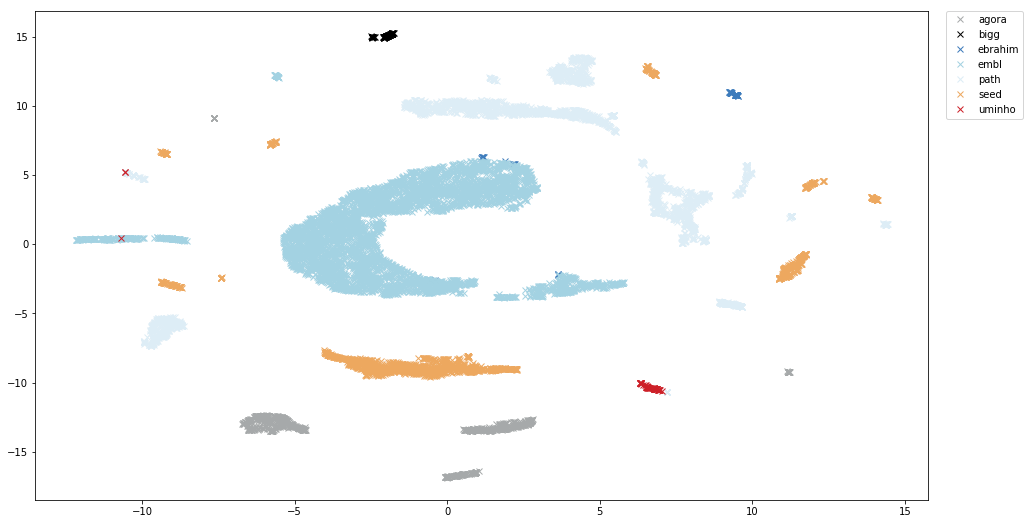

In [29]:
for label, color in zip(observations.index.get_level_values("collection").unique(), colors):
    mask = observations.index.get_level_values("collection") == label
    plt.plot(umap[mask, 0], umap[mask, 1], "x", color=color, label=label)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()